In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train=pd.read_csv('train (1).csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin and Embarked have nulls. Name, Sex, Ticket, Cabin and Embarked are objects.

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
(df_train.isnull().sum()/len(df_train))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Cabin and Age show very high percentages of nulls especially Cabin.

In [8]:
def  data_info(data):
  cols = data.columns
  unique_val = [data[col].value_counts().head(10).index.to_numpy() for col in cols]
  n_uniques = [data[col].nunique() for col in cols]
  dtypes = [data[col].dtype for col in cols]
  nulls = [data[col].isnull().sum() for col in cols]
  dup = [data.duplicated().sum() for col in cols]
  return pd.DataFrame({'Col':cols,'dtype':dtypes,'n_uniques':n_uniques,'n_nan':nulls,'unique_val':unique_val,'duplicated':dup})

In [9]:
data_info(df_train)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,PassengerId,int64,891,0,"[1, 599, 588, 589, 590, 591, 592, 593, 594, 595]",0
1,Survived,int64,2,0,"[0, 1]",0
2,Pclass,int64,3,0,"[3, 1, 2]",0
3,Name,object,891,0,"[Braund, Mr. Owen Harris, Boulos, Mr. Hanna, F...",0
4,Sex,object,2,0,"[male, female]",0
5,Age,float64,88,177,"[24.0, 22.0, 18.0, 19.0, 28.0, 30.0, 21.0, 25....",0
6,SibSp,int64,7,0,"[0, 1, 2, 4, 3, 8, 5]",0
7,Parch,int64,7,0,"[0, 1, 2, 5, 3, 4, 6]",0
8,Ticket,object,681,0,"[347082, CA. 2343, 1601, 3101295, CA 2144, 347...",0
9,Fare,float64,248,0,"[8.05, 13.0, 7.8958, 7.75, 26.0, 10.5, 7.925, ...",0


In [10]:
df_train=df_train.drop(('Ticket'),axis=1)

Dropped Name, PassengerId, and Ticket

Categorical_Features

In [11]:
def categorical_plot(data, columns,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if len(data[column].unique()) <= numbers_of_cat_value:
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.countplot(x=data[column], palette="rocket", hue=data[column])
            plt.title(f"Count Plot of {column}")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not categorical.")
    plt.tight_layout()
    plt.show()

Column 'PassengerId' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'Fare' is not categorical.
Column 'Cabin' is not categorical.


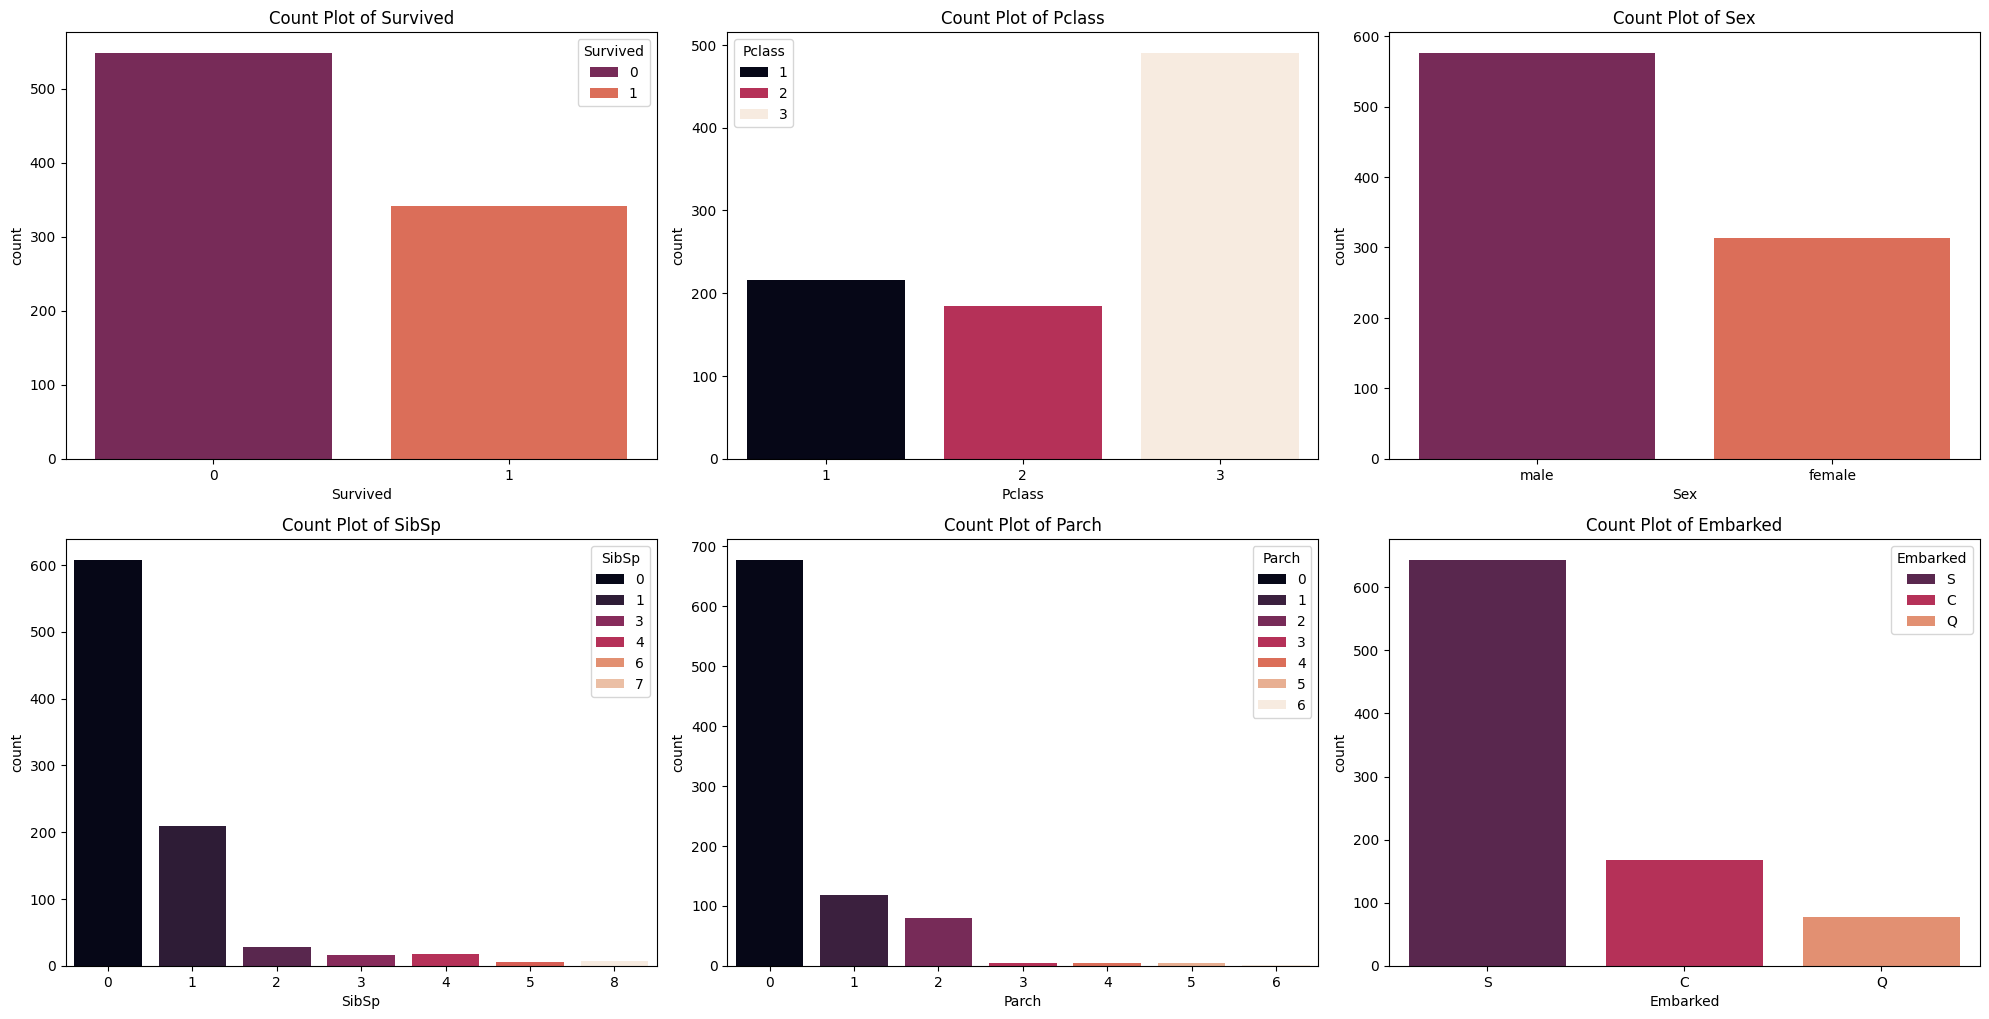

In [12]:
categorical_plot(df_train,df_train.columns,7)

Continous Features

In [13]:
def continuous_plot(data, columns,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if (data[column].nunique()) > numbers_of_cat_value and (data[column].dtype != 'object') and (data[column].value_counts().iloc[0]>=numbers_of_cat_value):
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.histplot(data[column],kde=True)
            plt.title(f"histogram plot of {column}")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not countinuous.")
    plt.tight_layout()
    plt.show()

Column 'PassengerId' is not countinuous.
Column 'Survived' is not countinuous.
Column 'Pclass' is not countinuous.
Column 'Name' is not countinuous.
Column 'Sex' is not countinuous.
Column 'SibSp' is not countinuous.
Column 'Parch' is not countinuous.
Column 'Cabin' is not countinuous.
Column 'Embarked' is not countinuous.


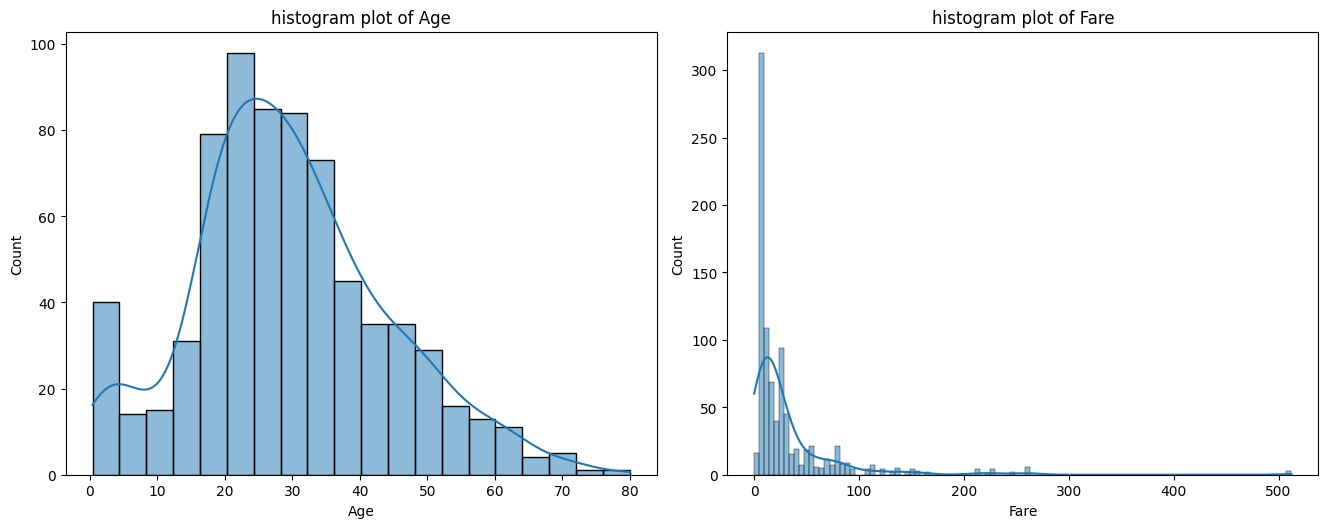

In [14]:
continuous_plot(df_train, df_train.columns,7)

In [15]:
df_train.skew(numeric_only=True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [16]:
def categorical_plot_wrt_Traget(data, columns,target):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if len(data[column].unique()) < 10:
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.countplot(x=data[column], palette="rocket", hue=data[target])
            plt.title(f"Count Plot of {column} wrt Survived ")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not categorical.")
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_plot_wrt_Traget(df_train,df_train.columns,"Survived")

Column 'PassengerId' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'Fare' is not categorical.
Column 'Cabin' is not categorical.


In [ ]:
import matplotlib.pyplot as plt

# Group by 'Survived' column and select the 'Age' column
df_train_grouped = df_train.groupby("Survived")["Age"]

plt.figure(figsize=(12, 6))

# Plot for Survived = 0
plt.subplot(1, 2, 1)
sns.histplot(df_train_grouped.get_group(0))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Survived = 0")

# Plot for Survived = 1
plt.subplot(1, 2, 2)
sns.histplot(df_train_grouped.get_group(1))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Survived = 1")

plt.tight_layout()
plt.show()


In [ ]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="rocket");

In [ ]:
sns.boxplot(x = "Pclass", y= "Age", palette = "rocket", data = df_train,hue="Pclass");

In [ ]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize=(25, 5))
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot(1, num_cols, i+1)
        sns.boxplot(x=numeric_columns[column])
        plt.title(f'Box plot for {column}')

In [ ]:
boxplot_numeric_columns(df_train)

In [ ]:
sns.heatmap(df_train.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [ ]:
df_train.drop('Cabin', axis=1, inplace=True)

In [ ]:
sns.heatmap(df_train.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [ ]:
df_train.isnull().sum()

In [ ]:
median_age_P1= df_train[df_train['Pclass']==1].Age.median()
median_age_P2= df_train[df_train['Pclass']==2].Age.median()
median_age_P3= df_train[df_train['Pclass']==3].Age.median()

df_train.loc[df_train['Pclass']==1, 'Age']= df_train[df_train['Pclass']==1].Age.fillna(median_age_P1)
df_train.loc[df_train['Pclass']==2, 'Age']= df_train[df_train['Pclass']==2].Age.fillna(median_age_P2)
df_train.loc[df_train['Pclass']==3, 'Age']= df_train[df_train['Pclass']==3].Age.fillna(median_age_P3)

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train['Embarked'].value_counts()

In [ ]:
df_train['Embarked']=df_train['Embarked'].fillna('S')

In [ ]:
sns.heatmap(df_train.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [ ]:
df_train.duplicated().sum()

In [ ]:
df_train.head(5)

In [ ]:
df_train.drop(['PassengerId','Name'],axis=1).duplicated().sum()

In [ ]:
def drop_duplicates(data,columns_uniques):
    index=data[data.drop(columns_uniques,axis=1).duplicated()].index
    print("Number of duplicated rows is",len(index))
    return data.drop(index,axis=0)

In [ ]:
df_train=drop_duplicates(df_train,columns_uniques=["PassengerId","Name"])

In [ ]:
df_train.reset_index()

In [ ]:
df_train=df_train.reset_index(drop=True)

In [ ]:
df_train=drop_duplicates(df_train,columns_uniques=["PassengerId","Name"])

In [ ]:
def remove_outliers_iqr_countinuous(data, columns):
    for col in columns:
        if data[col].dtype != 'object':
            q1, q3 = data[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_whisker, upper_whisker = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            filt = (data[col] < lower_whisker) | (data[col] > upper_whisker)
            data = data[~filt]
    return data.reset_index(drop=True)

In [ ]:
df_train=remove_outliers_iqr_countinuous(df_train,['Fare'])

In [ ]:
def remove_outliers_z_score_countinuous(data, upper_threshold=3, lower_threshold=-3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5:
            z_scores = (data[column] - data[column].mean()) / data[column].std()
            outliers = (z_scores < lower_threshold) | (z_scores > upper_threshold)
            data = data[~outliers]
    return data.reset_index(drop=True)


In [ ]:
df_train=remove_outliers_z_score_countinuous(df_train)

In [ ]:
boxplot_numeric_columns(df_train)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
def Skewness_log_square(data,numbers_of_cat_value):
    features = data.select_dtypes(np.number).columns
    for feature in features:
        if data[feature].nunique() <= numbers_of_cat_value:  # Check if unique values are greater than 10
            print(f" Categorical Features {feature} ")
            continue

        skewness = data[feature].skew()
        if skewness > 0.5:
            transformation = np.log1p
            transformation_name = "Log"
        elif skewness < -0.5:
            transformation = np.square
            transformation_name = "Square"
        else:
            print(f"Normal distribution {feature}")
            continue

        logTr = ColumnTransformer(transformers=[(transformation_name.lower(), FunctionTransformer(transformation), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_transformed = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_transformed, bins=20, kde=True, legend=False)
        plt.xlabel(feature)
        plt.show()

        print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew(), 5)} after {transformation_name} transformation.")
        data[feature] = df_transformed[0]
    return data


In [ ]:
df_train=Skewness_log_square(df_train,10)

In [ ]:
df_train.drop(['Name','PassengerId'],axis=1,inplace=True)

In [ ]:
df_train.skew(numeric_only=True)

In [ ]:
df_train

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["Sex"] = le.fit_transform(df_train_copy["Sex"])


In [ ]:
df_train

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["Embarked"] = le.fit_transform(df_train_copy["Embarked"])

In [ ]:
df_train

In [ ]:
df=df_train

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
X_train_scale=rob_scaler.fit_transform(X_train)
X_test_scale=rob_scaler.transform(X_test)

In [ ]:
X_test_scale

In [ ]:
df_test=pd.read_csv("/content/test (1).csv")

In [ ]:
df_test

In [ ]:
Seriers=df_test["Cabin"].value_counts()

In [ ]:
Seriers[Seriers<11]

In [ ]:
outliers=Seriers[Seriers<11].index

In [ ]:
df_test[df_test["Sex"].isin(["male"])]

In [ ]:
def remove_categorical_outliers(data, columns, threshold):
    for col in columns:
        series = data[col].value_counts()
        outliers = series[series < threshold].index
        data = data[~data[col].isin(outliers)]
        print(col,np.array(outliers))
    return data.reset_index(drop=True)

In [ ]:
threshold = 11
df_cleaned = remove_categorical_outliers(df_test, ["Cabin","Pclass","Parch"], threshold)

In [ ]:
df_cleaned